## Medial Axis


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from skimage.morphology import medial_axis
from skimage.util import invert
from planning import a_star
%matplotlib inline 

In [53]:
plt.rcParams['figure.figsize'] = 12, 12

In [54]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ..., 
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [55]:
start_ne = (25,  100)
goal_ne = (650, 500)

In [56]:
# Static drone altitude (meters)
drone_altitude = 5
safety_distance = 2

In [75]:
grid = create_grid(data, drone_altitude, safety_distance)
print(grid)
skeleton = medial_axis(invert(grid))
print(skeleton)


[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[False False False ...,  True  True  True]
 [False False False ..., False False  True]
 [False False False ..., False False  True]
 ..., 
 [False False False ..., False False  True]
 [False False False ..., False False  True]
 [ True  True  True ...,  True  True False]]


Plot the edges on top of the grid along with start and goal locations.

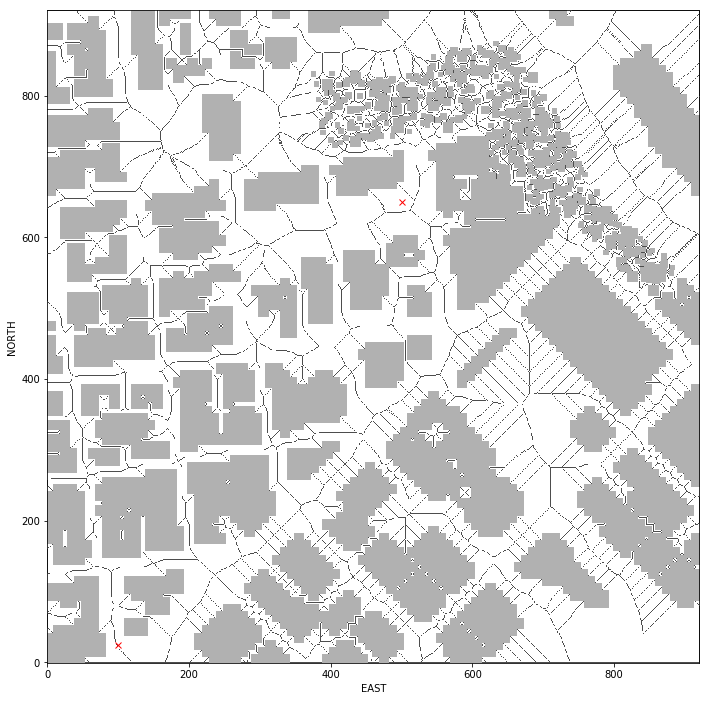

In [58]:
# equivalent to
# plt.imshow(np.flip(grid, 0))

plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [97]:
# TODO: Your start and goal location defined above
# will not necessarily be on the skeleton so you
# must first identify the nearest cell on the 
# skeleton to start and goal
def find_start_goal(skel, start, goal):
    # TODO: find start and goal on skeleton
    # Some useful functions might be:
        # np.nonzero()
        # np.transpose()
        # np.linalg.norm()
        # np.argmin()
        
    # get the list of skeleton points that are Valid (True) as an array of positions
    skp = np.transpose(np.nonzero(skel))
    
    # solution
    dst = np.array(start) - np.array(skp)
    nrm = np.linalg.norm(np.array(start) - np.array(skp), axis=1)
    start_min_dist = nrm.argmin()
    print(dst)
    print(nrm)
    print(start_min_dist)
    print(skp[start_min_dist])
    
    # compute euclician distance from start using a list comprehension
    dst = np.array([np.sqrt((start[0]-p[0])**2 + (start[1]-p[1])**2) for p in skp])
    print(dst)
    # find index of min distance
    idx = np.argmin(dst)
    # that index is the position of near_start
    near_start = (skp[idx][0],skp[idx][1])
    
    # compute euclidian distance from goal using a list comprehension
    dst = np.array([np.sqrt((goal[0]-p[0])**2 + (goal[1]-p[1])**2) for p in skp])
    print(dst)
    # find index of min distance
    idx = np.argmin(dst)
    # that index is the position of near_goal
    near_goal = (skp[idx][0],skp[idx][1])
    
    return near_start, near_goal, skp

skel_start, skel_goal, skp = find_start_goal(skeleton, start_ne, goal_ne)


# create a grid of only skeleton points
# all ones means all obstacles
skel_grid = np.ones(grid.shape)
# set skeleton points to 0 to mark allowable positions
for p in skp:
    skel_grid[p[0]][p[1]] = 0


[[  25   47]
 [  25   46]
 [  25   45]
 ..., 
 [-895 -817]
 [-895 -818]
 [-895 -819]]
[   53.23532662    52.35456045    51.4781507  ...,  1211.82259428
  1212.49701031  1213.1718757 ]
1122
[24 99]
[   53.23532662    52.35456045    51.4781507  ...,  1211.82259428
  1212.49701031  1213.1718757 ]
[ 788.86564129  788.29943549  787.73409219 ...,  496.77862273  497.61832764
  498.45862416]
(25, 100) (650, 500)
(24, 99) (636, 501)


In [88]:
def heuristic_func(position, goal_position):
    # euclidan distance
    return np.sqrt((position[0] - goal_position[0])**2 + (position[1] - goal_position[1])**2)


### TODO: Run A* on the skeleton
see [planning.py](/edit/planning.py) for a reminder on how to run the imported A* implementation (or rewrite it!)

In [89]:
# Compare to regular A* on the grid
#path2, cost2 = a_star(grid, heuristic_func, start_ne, goal_ne)
path,cost = a_star(grid, heuristic_func, start_ne, goal_ne)
path2,cost2 = a_star(skel_grid, heuristic_func,skel_start,skel_goal)

Found a path.
Found a path.


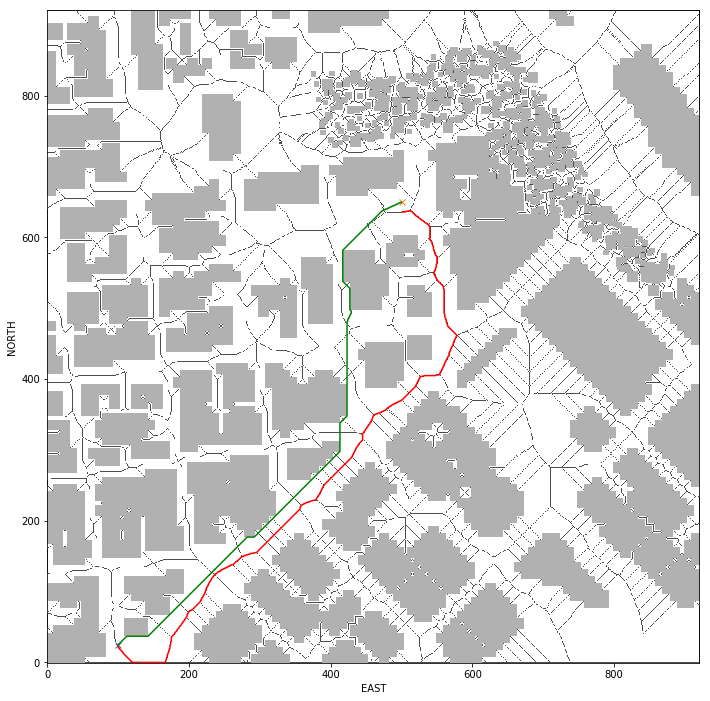

In [90]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
# Uncomment the following as needed
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
pp2 = np.array(path2)
plt.plot(pp2[:, 1], pp2[:, 0], 'r')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Medial-Axis-Solution.ipynb)